# Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
from importlib import reload

import numpy as np
import scipy as sp
import scipy.stats
import corner
from nose.tools import assert_true, assert_false

import matplotlib as mpl
import matplotlib.pyplot as plt

import kdes

# The need for a KDE

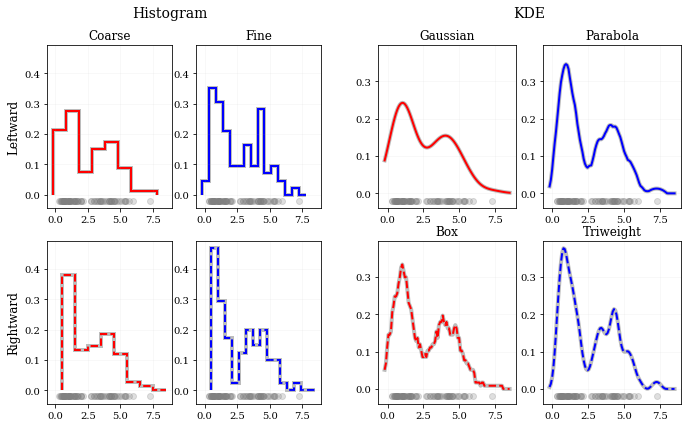

Saved to '/Users/lzkelley/Programs/kdes/notebooks/kde_motivation.png'


In [104]:
# Setup Figure and Axes
# --------------------------------------
fig = plt.figure(figsize=[10, 6])

# ---- Left Axes
gsl = mpl.gridspec.GridSpec(2, 2)
gsl.update(left=0.08, right=0.46, wspace=0.2, hspace=0.2, top=0.9, bottom=0.07)
axes_ll = np.empty([2, 2], dtype=object)
ax_ref = None
for (ii, jj), ax in np.ndenumerate(axes_ll):
    kw = dict(sharex=ax_ref, sharey=ax_ref) if ax_ref is not None else {}
    ax = plt.subplot(gsl[ii, jj], **kw)
    ax.grid(alpha=0.1)
    axes_ll[ii, jj] = ax
    ax_ref = ax

fig.text(0.25, 0.99, "Histogram", horizontalalignment='center', verticalalignment='top', size=14)
axes_ll[0, 0].set_ylabel('Leftward', size=12)
axes_ll[0, 0].set_title('Coarse', size=12)
axes_ll[0, 1].set_title('Fine', size=12)
axes_ll[1, 0].set_ylabel('Rightward', size=12)

# ---- Right Axes
gsr = mpl.gridspec.GridSpec(2, 2)
gsr.update(left=0.54, right=0.96, wspace=0.2, hspace=0.2, top=0.9, bottom=0.07)
axes_rr = np.empty([2, 2], dtype=object)
ax_ref = None
for (ii, jj), ax in np.ndenumerate(axes_ll):
    kw = dict(sharex=ax_ref, sharey=ax_ref) if ax_ref is not None else {}
    ax = plt.subplot(gsr[ii, jj], **kw)
    ax.grid(alpha=0.1)
    axes_rr[ii, jj] = ax
    ax_ref = ax

fig.text(0.75, 0.99, "KDE", horizontalalignment='center', verticalalignment='top', size=14)

colors = ['r', 'b', 'r', 'b']
lines = ['-', '-', '--', '--']
    

# Create (semi-)Random Data
# --------------------------------------
NUM = 80
np.random.seed(12345)
a1 = np.random.normal(4.0, 1.0, NUM//2)
a2 = np.random.lognormal(0, 0.5, size=(NUM - a1.size))
data = np.concatenate([a1, a2])



# Plot Histograms
# ---------------------------------
bg = dict(color='0.25', lw=4.0, alpha=0.35)

starts = [-0.2, -0.2, 0.5, 0.5]
numbers = [9, 16, 9, 16]

for ii, ax in enumerate(axes_ll.flatten()):
    edges = np.linspace(starts[ii], starts[ii]+8.0, numbers[ii])

    ax.hist(data, bins=edges, histtype='step', density=True, **bg)
    ax.hist(data, bins=edges, color=colors[ii], density=True, ls=lines[ii],
            histtype='step', lw=2.0)
    
    ax.plot(data, -0.02*np.ones_like(data), 'o', color='0.5', alpha=0.25, lw=0.5)

    
    
# Plot KDEs
# ---------------------------------

# bandwidths = ['scott', 0.3, 'scott', 0.3]
# kernels = ['Gaussian', 'Gaussian', 'Box', 'Box']
kernels = ['Gaussian', 'Parabola', 'Box', 'Triweight']
bandwidths = [None] * len(kernels)
grid = np.linspace(-0.2, 8.5, 100)

for ii, ax in enumerate(axes_rr.flatten()):
    kde = kdes.KDE(data, kernel=kernels[ii], bandwidth=bandwidths[ii])
    ax.set_title(kernels[ii])
    pdf = kde.pdf(grid)
    ax.plot(grid, pdf, **bg)
    ax.plot(grid, pdf, color=colors[ii], ls=lines[ii], lw=2.0)

    ax.plot(data, -0.02*np.ones_like(data), 'o', color='0.5', alpha=0.25, lw=0.5)
    
plt.show()
fname = 'kde_motivation.png'
fig.savefig(fname)
print("Saved to '{}'".format(os.path.abspath(fname)))

[0.3675784  7.96578057]


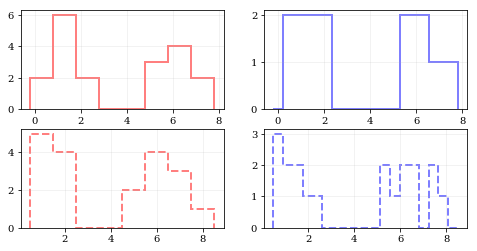

In [19]:
NUM = 20
np.random.seed(12345)
a1 = np.random.normal(6.0, 1.0, NUM//2)
a2 = np.random.lognormal(0, 0.5, size=NUM//2)
aa = np.concatenate([a1, a2])

print(kdes.utils.minmax(aa))

edges = [
    np.linspace(-0.2, 7.8, 9),
    np.linspace(-0.2, 7.8, 20),
    np.linspace(0.5, 8.5, 9),
    np.linspace(0.5, 8.5, 20)
]

colors = ['r', 'b', 'r', 'b']
lines = ['-', '-', '--', '--']

fig, axes = plt.subplots(figsize=[8, 4], ncols=2, nrows=2)
for ii, (bins, cc, ls) in enumerate(zip(edges, colors, lines)):
    ax = axes.flatten()[ii]
    ax.grid(alpha=0.2)
    ax.hist(aa, bins=bins, color=cc, alpha=0.5, ls=ls, histtype='step', lw=2.0)

plt.show()


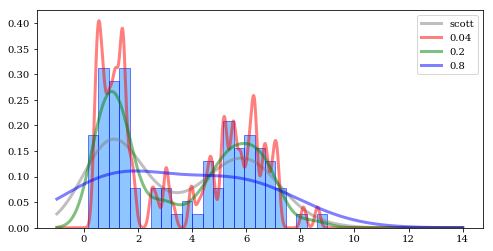

In [2]:
NUM = 100
a1 = np.random.normal(6.0, 1.0, NUM//2)
a2 = np.random.lognormal(0, 0.5, size=NUM//2)
aa = np.concatenate([a1, a2])

bins = kdes.utils.spacing([-1, 14.0], 'lin', 40)
grid = kdes.utils.spacing(bins, 'lin', 3000)

fig, ax = plt.subplots(figsize=[8, 4])
ax.hist(aa, bins=bins, facecolor='dodgerblue', edgecolor='b', alpha=0.5, density=True)

methods = ['scott', 0.04, 0.2, 0.8]
colors = ['0.5', 'r', 'g', 'b']
for mm, cc in zip(methods, colors):
    lab = mm if isinstance(mm, str) else "{:.1f}".format(mm)
    kde = kdes.KDE(aa, bandwidth=mm)
    ax.plot(grid, kde.pdf(grid), color=cc, alpha=0.5, lw=3.0, label=mm)

plt.legend(loc='upper right')
plt.show()

# Multivariate Distributions

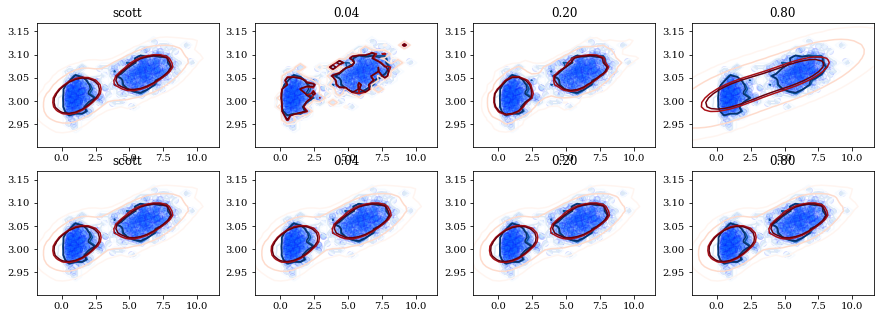

In [3]:
NUM = 1000
a1 = np.random.normal(6.0, 1.0, NUM//2)
a2 = np.random.lognormal(0, 0.5, size=NUM//2)
aa = np.concatenate([a1, a2])

bb = np.random.normal(3.0, 0.02, NUM) + aa/100

data = [aa, bb]
edges = [kdes.utils.spacing(dd, 'lin', 30, stretch=0.5) for dd in data]
cents = [kdes.utils.midpoints(ee, 'lin') for ee in edges]

xe, ye = np.meshgrid(*edges)
xc, yc = np.meshgrid(*cents)
grid = np.vstack([xc.ravel(), yc.ravel()])


methods = ['scott', 0.04, 0.2, 0.8]

fig, axes = plt.subplots(figsize=[15, 5], ncols=len(methods), nrows=2)
kde_funcs = [sp.stats.gaussian_kde, kdes.KDE]

percs = sp.stats.norm.cdf([-1, 0, 1])
levels = sp.stats.norm.cdf([-2, -1, 1, 2])

for axcol, mm in zip(axes.T, methods):
    lab = mm if isinstance(mm, str) else "{:.2f}".format(mm)
    
    for ax, kdefun in zip(axcol, kde_funcs):
        ax.set_title(lab)

        ax.scatter(*data, facecolor='dodgerblue', edgecolor='b', alpha=0.1)
        hist, *_ = np.histogram2d(*data, bins=edges, density=True)
        ax.contour(xc, yc, hist.T, levels=levels, cmap='Blues')

        kde = kdefun(data, bw_method=mm)
        pdf = kde.pdf(grid).reshape(hist.shape).T
        ax.contour(xc, yc, pdf.T, levels=levels, cmap='Reds')

plt.show()

## Projections and Subsampling

tot = 9.9999e-01
tot = 9.9999e-01
tot = 9.9986e-01
tot = 9.9986e-01


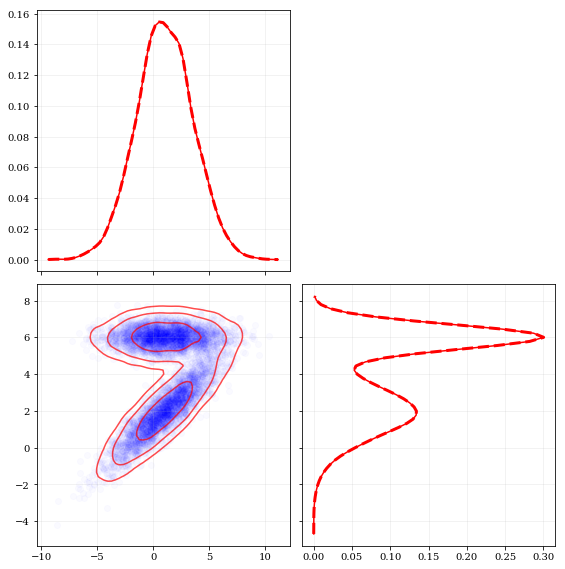

saved to '/Users/lzkelley/Programs/kdes/notebooks/2d_pdf_projection.png'


In [4]:
NUM = 3000
bandwidth = 0.2

sigma = [2.5, 1.5]
corr = 0.9

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]
cov = np.array(cov)

data = np.random.multivariate_normal([1.0, 2.0], cov, NUM).T

sigma = [2.5, 0.5]
corr = 0.0

s2 = np.square(sigma)
cc = corr*sigma[0]*sigma[1]
cov = [[s2[0], cc], [cc, s2[1]]]
cov = np.array(cov)
more = np.random.multivariate_normal([1.0, 6.0], cov, NUM).T
data = np.concatenate([data, more], axis=-1)

kde = kdes.KDE(data, bandwidth=bandwidth)


edges = [kdes.utils.spacing(dd, 'lin', 60, stretch=0.1) for dd in data]
cents = [kdes.utils.midpoints(ee, 'lin') for ee in edges]
widths = [np.diff(ee) for ee in edges]
area = widths[0][:, np.newaxis] * widths[1][np.newaxis, :]

xe, ye = np.meshgrid(*edges)
xc, yc = np.meshgrid(*cents)
grid = np.vstack([xc.ravel(), yc.ravel()])

hist, *_ = np.histogram2d(*data, bins=edges, density=True)
levels = kdes.utils.spacing(hist[hist > 0], 'log', 4)

fig, axes = plt.subplots(figsize=[8, 8], ncols=2, nrows=2, sharex='col', sharey='row')
plt.subplots_adjust(left=0.08, bottom=0.05, top=0.98, right=0.98, hspace=0.05, wspace=0.05)

for (ii, jj), ax in np.ndenumerate(axes):
    if ii == 0 and jj == 1:
        ax.set_visible(False)
        continue
    
    ax.grid(alpha=0.2)
        

ax = axes[1, 0]
ax.scatter(*data, alpha=0.02, color='b')

pdf = kde.pdf(grid).reshape(hist.shape).T
ax.contour(xc, yc, pdf.T, levels=levels, colors='r', alpha=0.7)

# ax.contour(xc, yc, hist.T, levels=levels, colors='0.5', linewidths=2.0, alpha=0.45)
# ax.contour(xc, yc, hist.T, levels=levels, colors='r', linewidths=1.0, alpha=0.7)

for par in range(2):
    ax = axes[par, par]
    xx = cents[par]
    pdf_2d = kde.pdf(xx, params=par)
    kde_1d = kdes.KDE(data[par, :], bandwidth=bandwidth)
    pdf_1d = kde_1d.pdf(xx)
    # print("matrix : ", kde.bandwidth.matrix, kde_1d.bandwidth.matrix)
    assert_true(np.allclose(pdf_2d, pdf_1d, rtol=1e-3))
    
    for pdf, ls, lw in zip([pdf_2d, pdf_1d], ['-', '--'], [1.5, 3.0]):

        tot = np.sum(pdf*widths[par])
        print("tot = {:.4e}".format(tot))
        assert_true(np.isclose(tot, 1.0, rtol=1e-2))
        vals = [xx, pdf]
        if par == 1:
            vals = vals[::-1]

        ax.plot(*vals, color='r', ls=ls, lw=lw)
    
plt.show()


fname = '2d_pdf_projection.png'
fig.savefig(fname)
print("saved to '{}'".format(os.path.abspath(fname)))